# Breast Cancer Prediction

#### Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')

#### Reading CSV file data and displaying first five values of the dataset 

In [18]:
df = pd.read_csv("breast-cancer-wisconsin.data", names=['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Let's find out how many rows and columns are there in the dataset

In [6]:
df.shape

(699, 11)

#### Let's heck the data type of data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


#### Let's look for missing values in data

In [19]:
df.isna().sum()

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

#### As Bare Nucli is having object datatype so we are checking all unique values

> Indented block



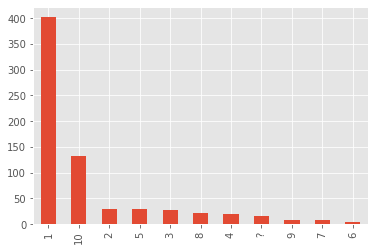

In [30]:
df['Bare Nuclei'].value_counts().plot(kind='bar')

#### To make data more relevant, here we are replacing  "?" with NaN value

In [31]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.NaN)
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

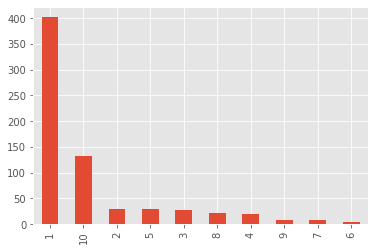

In [32]:
df['Bare Nuclei'].value_counts().plot(kind='bar')

##### checking all unique features

In [33]:
df.nunique()

id                             645
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

#### converting the object type to numeric

In [34]:
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"])

In [35]:
#checking out the unique values in the column
df['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

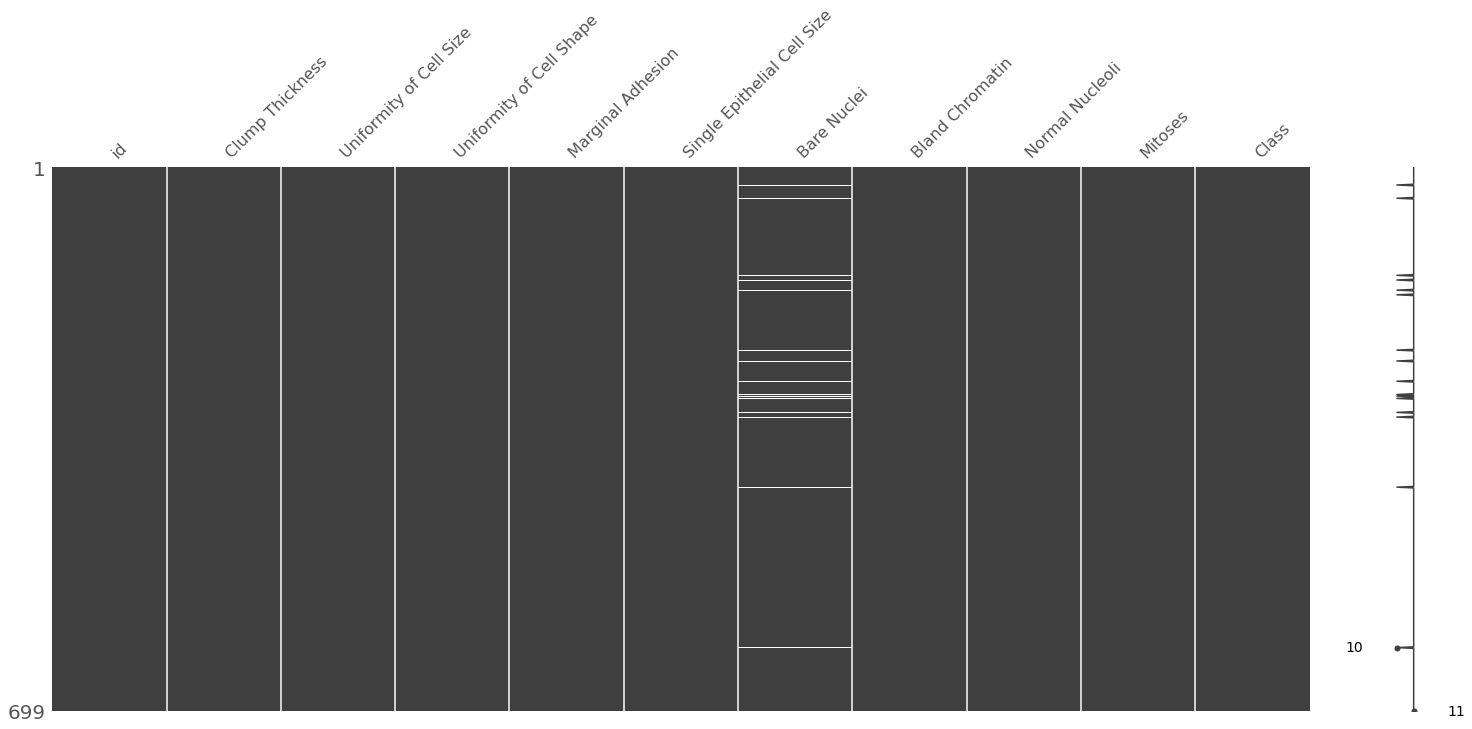

In [38]:
msno.matrix(df)

In [39]:
(df['Bare Nuclei'].isna().sum()/df['Bare Nuclei'].shape[0])*100

2.28898426323319

Using the missingno library we determined the number of NaN values in our dataset. 
There are 2.28% of null values in the Bare Nuclei column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


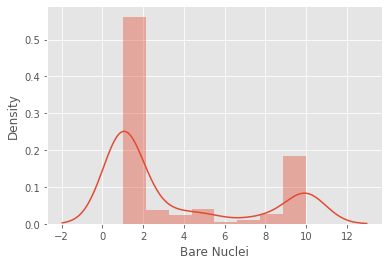

In [41]:
sns.distplot(df['Bare Nuclei'])
#Bimodal Distribution

The majority of the values are at around 1-2 and at 9-10, this type of a distribution is known as Bimodal Distribution.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


#### Using KNNImputer, Imputation for completing missing values will be done

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=7)
imputed_df = imputer.fit_transform(df)
df = pd.DataFrame(imputed_df, columns=df.columns)
df

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [ ]:
df.isna().sum(axis = 0)

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

##### As we donot require the customer id for data computation, so here we are making customer id as index value

In [ ]:
df = df.set_index("id")
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id,,,,,,,,,,
1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0


##### gathering all 

In [ ]:
df[df.columns.difference(['Class'])]

,Bare Nuclei,Bland Chromatin,Clump Thickness,Marginal Adhesion,Mitoses,Normal Nucleoli,Single Epithelial Cell Size,Uniformity of Cell Shape,Uniformity of Cell Size
id,,,,,,,,,
1000025.0,1.0,3.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0
1002945.0,10.0,3.0,5.0,5.0,1.0,2.0,7.0,4.0,4.0
1015425.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0
1016277.0,4.0,3.0,6.0,1.0,1.0,7.0,3.0,8.0,8.0
1017023.0,1.0,3.0,4.0,3.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
776715.0,2.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0
841769.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
888820.0,3.0,8.0,5.0,3.0,2.0,10.0,7.0,10.0,10.0


In [ ]:
features = df[df.columns.difference(['Class'])]
labels = df['Class']

In [ ]:
corr = features.corr()
corr.style.background_gradient(cmap='coolwarm')

,Bare Nuclei,Bland Chromatin,Clump Thickness,Marginal Adhesion,Mitoses,Normal Nucleoli,Single Epithelial Cell Size,Uniformity of Cell Shape,Uniformity of Cell Size
Bare Nuclei,1.000000,0.672521,0.584993,0.662488,0.336511,0.574798,0.579754,0.705920,0.684098
Bland Chromatin,0.672521,1.000000,0.558428,0.666715,0.344169,0.665878,0.616102,0.735948,0.755721
Clump Thickness,0.584993,0.558428,1.000000,0.486356,0.350034,0.535835,0.521816,0.654589,0.644913
Marginal Adhesion,0.662488,0.666715,0.486356,1.000000,0.417633,0.603352,0.599599,0.683079,0.705582
Mitoses,0.336511,0.344169,0.350034,0.417633,1.000000,0.428336,0.479101,0.438911,0.458693
Normal Nucleoli,0.574798,0.665878,0.535835,0.603352,0.428336,1.000000,0.628881,0.719446,0.722865
Single Epithelial Cell Size,0.579754,0.616102,0.521816,0.599599,0.479101,0.628881,1.000000,0.719668,0.751799
Uniformity of Cell Shape,0.705920,0.735948,0.654589,0.683079,0.438911,0.719446,0.719668,1.000000,0.906882
Uniformity of Cell Size,0.684098,0.755721,0.644913,0.705582,0.458693,0.722865,0.751799,0.906882,1.000000


In [ ]:
corr_matrix = corr.abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
features = features.drop(columns=to_drop, axis=1)
features

C:\Users\kkirt\AppData\Local\Temp/ipykernel_2244/742018224.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Bare Nuclei,Clump Thickness,Mitoses,Single Epithelial Cell Size
id,,,,
1000025.0,1.0,5.0,1.0,2.0
1002945.0,10.0,5.0,1.0,7.0
1015425.0,2.0,3.0,1.0,2.0
1016277.0,4.0,6.0,1.0,3.0
1017023.0,1.0,4.0,1.0,2.0
...,...,...,...,...
776715.0,2.0,3.0,1.0,3.0
841769.0,1.0,2.0,1.0,2.0
888820.0,3.0,5.0,2.0,7.0


In [ ]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
norm_features = transformer.fit_transform(features)
norm_features = pd.DataFrame(norm_features, columns=features.columns, index=features.index)
norm_features

,Bare Nuclei,Clump Thickness,Mitoses,Single Epithelial Cell Size
id,,,,
1000025.0,0.179605,0.898027,0.179605,0.359211
1002945.0,0.755929,0.377964,0.075593,0.529150
1015425.0,0.471405,0.707107,0.235702,0.471405
1016277.0,0.508001,0.762001,0.127000,0.381000
1017023.0,0.213201,0.852803,0.213201,0.426401
...,...,...,...,...
776715.0,0.417029,0.625543,0.208514,0.625543
841769.0,0.316228,0.632456,0.316228,0.632456
888820.0,0.321634,0.536056,0.214423,0.750479


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
seed = 145
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=seed)

In [ ]:
Probability 0 and 1 

P1 0.45 --> 2 
P2 0.99--> 4

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
f(x) = 1/ (1+ exp(-x))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
weights = list(model.coef_[0])
columns = list(features.columns)
feature_weights = pd.DataFrame([columns, weights])
feature_weights